In [1]:
import os
import math
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [2]:
# path to hdf5 file
path_hdf5 = '/media/philipp/8044E96044E95984/data/time_series/modis_smooth.h5'

hdf5_modis = h5py.File(path_hdf5, 'r')

In [3]:
# path to hdf5 file
#path_hdf5 = '/home/philipp/Data/modis/modis_smooth.h5'

#hdf5_modis = h5py.File(path_hdf5, 'r')

In [4]:
wht = hdf5_modis['whittaker']

In [5]:
wht[90,1000,:]

array([0.34783572, 0.35252702, 0.35720897, ..., 0.3214038 , 0.31790933,
       0.31441486], dtype=float32)

In [7]:
whit = np.array(wht[90,500,:])
np.save('/home/philipp/Data/modis/modis_90_500.npy', whit)

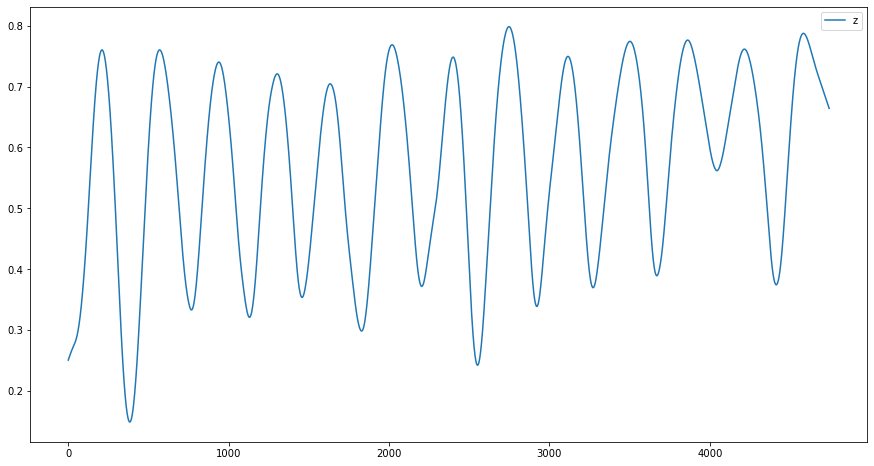

In [17]:
# plot time series of pixel
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(wht[90,500,:], label='z')
ax.legend()

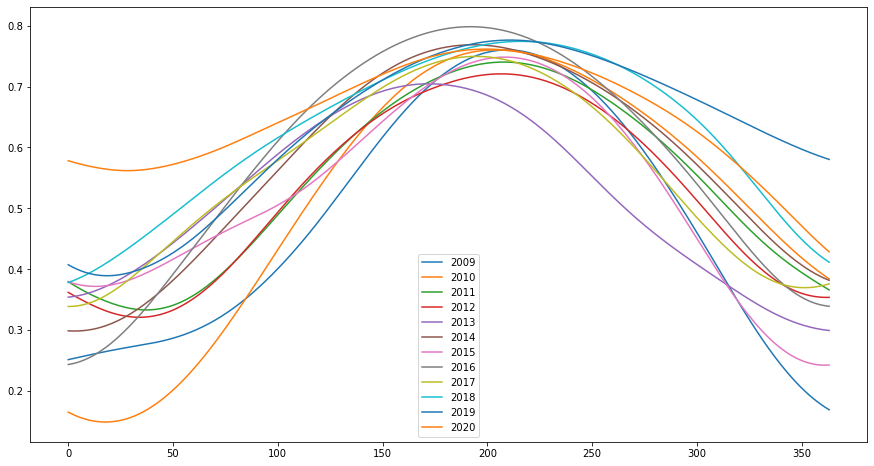

In [27]:
x = 0
y = 365
z = wht[90,500,:]

fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(z[x+1:x+y], label='2009')
ax.plot(z[x+y*1+1:x+y*2], label='2010')
ax.plot(z[x+y*2+1:x+y*3], label='2011')
ax.plot(z[x+y*3+1:x+y*4], label='2012')
ax.plot(z[x+y*4+1:x+y*5], label='2013')
ax.plot(z[x+y*5+1:x+y*6], label='2014')
ax.plot(z[x+y*6+1:x+y*7], label='2015')
ax.plot(z[x+y*7+1:x+y*8], label='2016')
ax.plot(z[x+y*8+1:x+y*9], label='2017')
ax.plot(z[x+y*9+1:x+y*10], label='2018')
ax.plot(z[x+y*10+1:x+y*11], label='2019')
ax.plot(z[x+y*11+1:x+y*12], label='2020')
ax.legend()

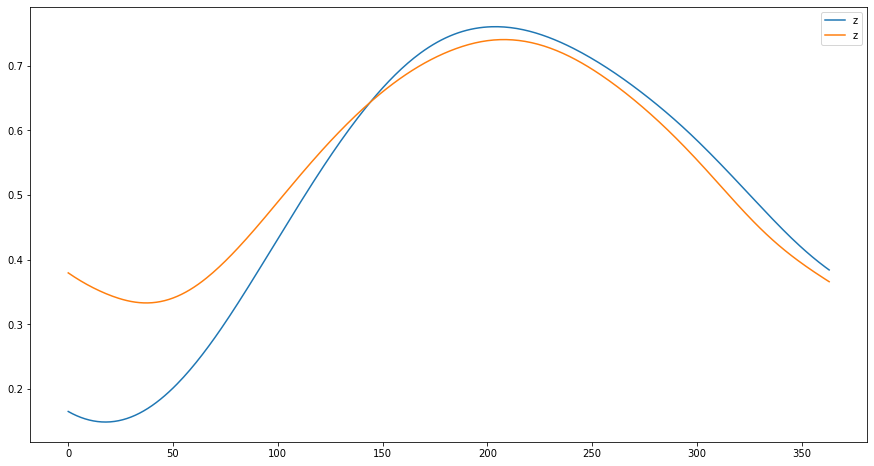

In [63]:
# plot time series of pixel
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(wht[90,500,:][x+y*1+1:x+y*2], label='z')
ax.plot(wht[90,500,:][x+y*2+1:x+y*3], label='z')
ax.legend()

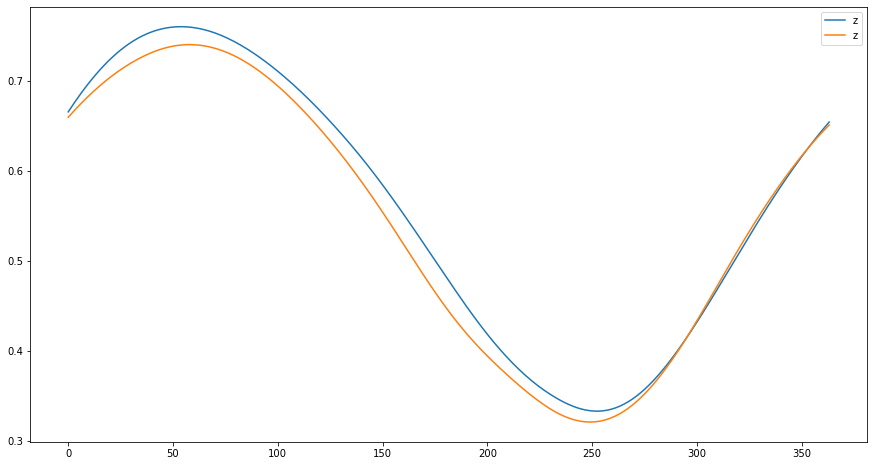

In [67]:
# plot time series of pixel
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(wht[90,500,:][x+y*1+1+150:x+y*2+150], label='z')
ax.plot(wht[90,500,:][x+y*2+1+150:x+y*3+150], label='z')
ax.legend()

In [9]:
x = 0
y = 365

pixel = {}

for i in range(1,12):
    pixel[str(2009+i)] = np.array(whit[x+y*i+1:x+y*(i+1)])
    
pixel_end = {}

for i in range(1,12):
    pixel_end[str(2009+i)] = np.array(whit[x+y*i+1+150:x+y*(i+1)+150])

In [10]:
print(pixel['2010'].min())
print(pixel['2010'].max())
print((pixel['2010'].max()-pixel['2010'].min())*0.2 + pixel['2010'].min())

0.14899415
0.76028895
0.2712531089782715


In [11]:
# get SOS

idx_min = np.where(pixel['2010'] == pixel['2010'].min())[0][0]
idx_max = np.where(pixel['2010'] == pixel['2010'].max())[0][0]

pix_20 = (pixel['2010'].max()-pixel['2010'].min())*0.2 + pixel['2010'].min()

# get EOS

idxe_min = np.where(pixel_end['2010'] == pixel_end['2010'].min())[0][0]
idxe_max = np.where(pixel_end['2010'] == pixel_end['2010'].max())[0][0]

pixe_20 = (pixel_end['2010'].max()-pixel_end['2010'].min())*0.2 + pixel_end['2010'].min()

In [12]:
# find index of 20% -> SOS

for i in range(idx_min+1, idx_max):
    if pixel['2010'][i] >= pix_20:
        idx_20 = i
        print(i)
        break
        
# find index of 20% -> EOS

for i in range(idxe_min-1, idxe_max, -1):
    if pixel_end['2010'][i] >= pixe_20:
        idxe_20 = i+150
        print(i+150)
        break

69
349


In [13]:
print(idx_20)
print(idx_max)
print(idxe_20)

69
204
349


In [27]:
def get_pheno(pixel,year,typ='sos'):
    
    # get SOS
    minimum = pixel[year].min()
    maximum = pixel[year].max()
    
    idx_min = np.where(pixel[year] == minimum)[0][0]
    idx_max = np.where(pixel[year] == maximum)[0][0]

    pix_20 = (maximum-minimum)*0.2 + minimum
    
    # find index of 20% -> SOS
    if typ == 'sos':
        temp = 1
        offset = 0
    elif typ == 'eos':
        temp = -1
        offset = 150
    
    for i in range(idx_min+temp, idx_max, temp):
        if pixel[year][i] >= pix_20:
            idx_20 = i+offset
            break
            
    return idx_20

In [28]:
# SOS
get_pheno(pixel,'2010',typ='sos')

69

In [29]:
# EOS
get_pheno(pixel_end,'2010',typ='eos')

349

In [6]:
img = np.array(wht[:,:,100])

In [7]:
np.argmax(img,axis=0)

array([  57,  122,   93, ..., 1172, 1173, 1089])

In [8]:
np.argmax(img,axis=1)

array([1120, 1424, 1424, ...,  270,  271,  134])

In [9]:
img[122,1120]

0.522386

(array([[1184.,    4.,    3., ...,   10.,   82.,    4.],
        [1178.,    2.,    3., ...,   11.,   82.,    6.],
        [1178.,    2.,    2., ...,    4.,   91.,    5.],
        ...,
        [ 160.,   83.,  107., ...,   98.,   61.,    3.],
        [ 168.,   69.,  113., ...,  103.,   52.,    5.],
        [ 165.,   71.,  110., ...,  113.,   41.,    4.]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <a list of 1864 BarContainer objects>)

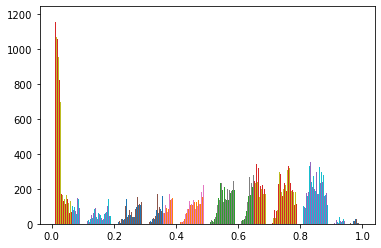

In [36]:
plt.hist(img)

(array([[1.000e+00, 1.000e+00, 1.183e+03, ..., 7.100e+01, 1.100e+01,
         0.000e+00],
        [0.000e+00, 3.000e+00, 1.177e+03, ..., 7.100e+01, 1.100e+01,
         1.000e+00],
        [1.000e+00, 1.000e+00, 1.175e+03, ..., 8.000e+01, 8.000e+00,
         0.000e+00],
        ...,
        [0.000e+00, 1.210e+02, 1.000e+02, ..., 7.700e+01, 6.000e+00,
         2.000e+00],
        [1.000e+00, 1.150e+02, 1.130e+02, ..., 7.600e+01, 4.000e+00,
         0.000e+00],
        [1.000e+00, 1.090e+02, 1.250e+02, ..., 8.900e+01, 1.000e+00,
         0.000e+00]]),
 array([-0.3       , -0.17000002, -0.04000001,  0.08999999,  0.22      ,
         0.35      ,  0.48      ,  0.61      ,  0.74      ,  0.87      ,
         1.        ], dtype=float32),
 <a list of 1864 BarContainer objects>)

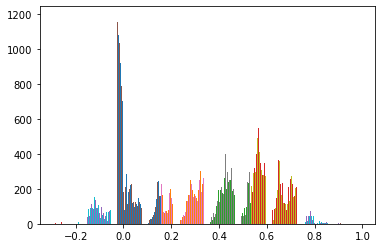

In [10]:
plt.hist(img)

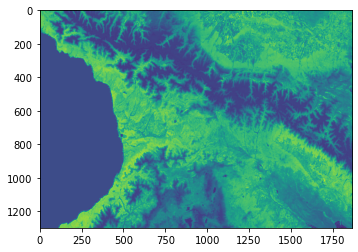

In [11]:
plt.imshow(img)

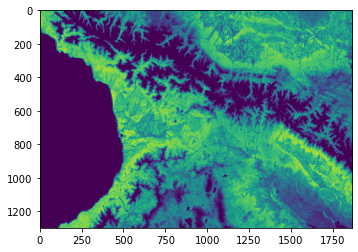

In [34]:
plt.imshow(img)

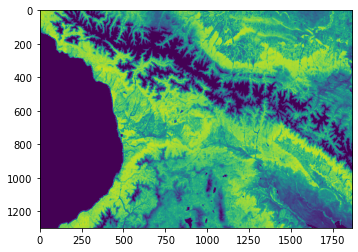

In [37]:
plt.imshow(img)

In [11]:
wht[:,:,100].shape

(1299, 1864)